In [306]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from imgaug import augmenters as iaa
import draw_boxes

%matplotlib inline

(1200, 1600)


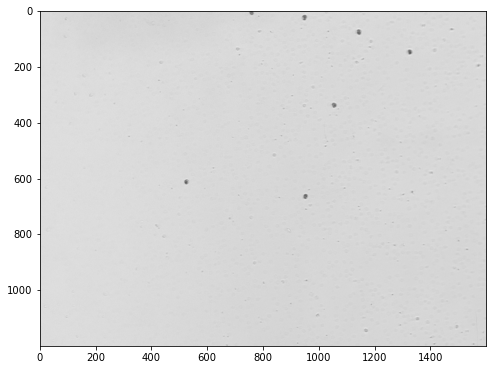

In [307]:
image = cv2.imread('./single-training-data/200260_116_351_(0, 0).jpg', 0)
print(image.shape)
image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
plt.figure(figsize=(8,8))
plt.imshow(image)


(1200, 1600, 3)


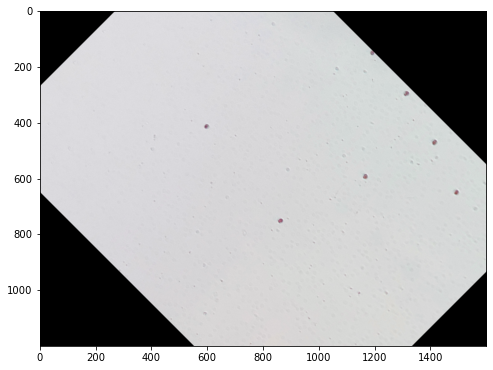

In [260]:
image = cv2.imread('./single-training-data/200260_116_351_(0, 0).jpg')

seq = iaa.Sequential([
    iaa.Rotate((45, 45))
])

# image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img_aug = seq(image=image)

print(img_aug.shape)
# img_aug = cv2.cvtColor(img_aug, cv2.COLOR_GRAY2BGR)
plt.figure(figsize=(8,8))
plt.imshow(img_aug)

(1200, 1600, 3)


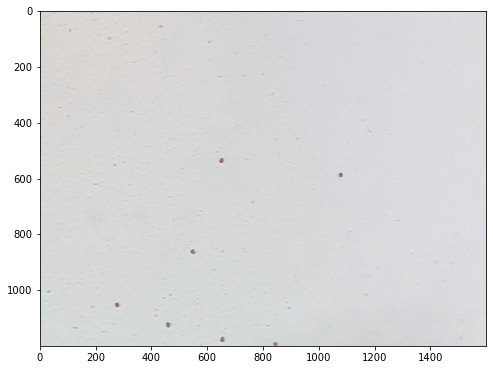

In [261]:
image = cv2.imread('./single-training-data/200260_116_351_(0, 0).jpg')

seq = iaa.Sequential([
    iaa.Flipud(1.0),
    iaa.Fliplr(1.0)
])

# image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img_aug = seq(image=image)

print(img_aug.shape)
# img_aug = cv2.cvtColor(img_aug, cv2.COLOR_GRAY2BGR)
plt.figure(figsize=(8,8))
plt.imshow(img_aug)

(1200, 1600, 3)


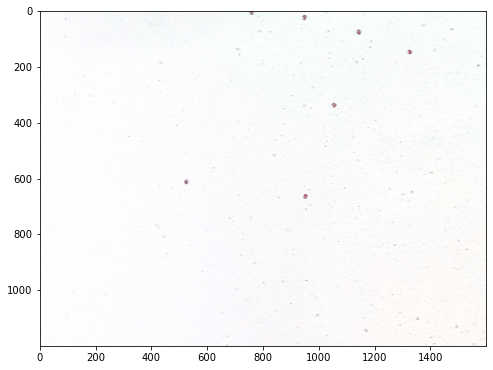

In [262]:
image = cv2.imread('./single-training-data/200260_116_351_(0, 0).jpg')

seq = iaa.Sequential([
    iaa.Sharpen(alpha=(0.3, 0.5), lightness=(0.75,2.0))
])

# image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img_aug = seq(image=image)

print(img_aug.shape)
# img_aug = cv2.cvtColor(img_aug, cv2.COLOR_GRAY2BGR)
plt.figure(figsize=(8,8))
plt.imshow(img_aug)

(1200, 1600, 3)


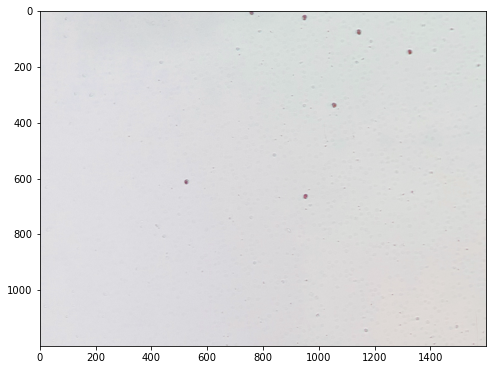

In [264]:
image = cv2.imread('./single-training-data/200260_116_351_(0, 0).jpg')

seq = iaa.Sequential([
    iaa.AddToBrightness((-50, 50))
])

# image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img_aug = seq(image=image)

print(img_aug.shape)
# img_aug = cv2.cvtColor(img_aug, cv2.COLOR_GRAY2BGR)
plt.figure(figsize=(8,8))
plt.imshow(img_aug)

(1200, 1600, 3)


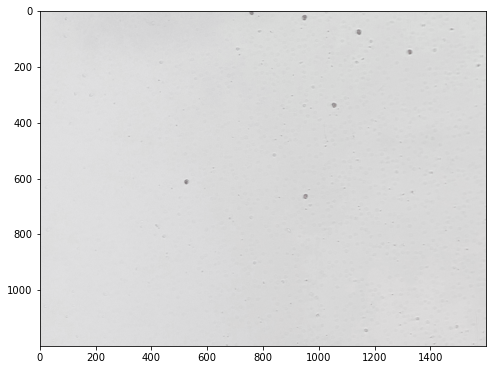

In [270]:
image = cv2.imread('./single-training-data/200260_116_351_(0, 0).jpg')

seq = iaa.Sequential([
    iaa.RemoveSaturation((0.5,1.0))
])

# image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img_aug = seq(image=image)

print(img_aug.shape)
# img_aug = cv2.cvtColor(img_aug, cv2.COLOR_GRAY2BGR)
plt.figure(figsize=(8,8))
plt.imshow(img_aug)

(1200, 1600, 3)


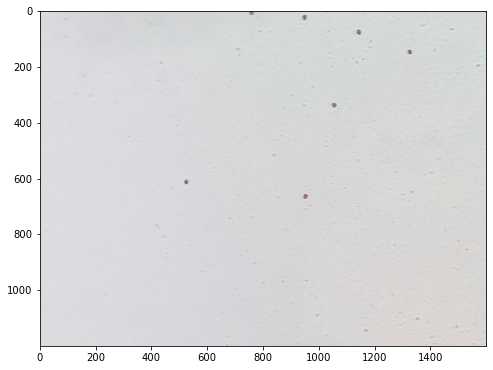

In [271]:
image = cv2.imread('./single-training-data/200260_116_351_(0, 0).jpg')

seq = iaa.pillike.FilterDetail()

# image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img_aug = seq(image=image)

print(img_aug.shape)
# img_aug = cv2.cvtColor(img_aug, cv2.COLOR_GRAY2BGR)
plt.figure(figsize=(8,8))
plt.imshow(img_aug)

(1200, 1600, 3)


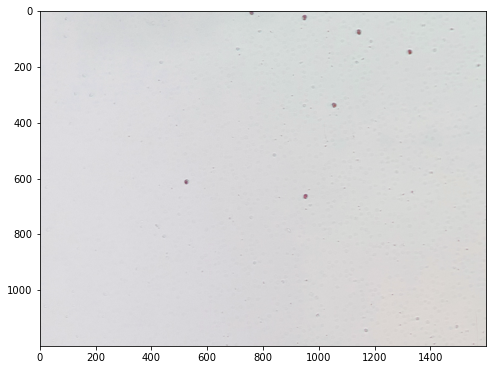

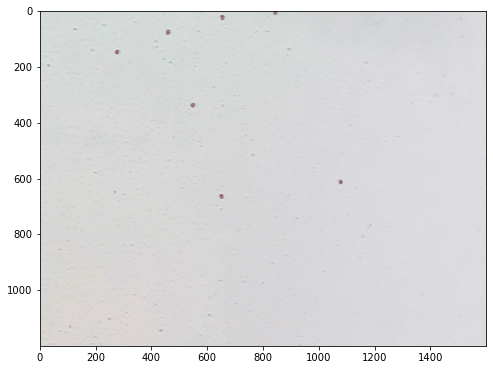

In [109]:
image = cv2.imread('./single-training-data/200260_116_351_(0, 0).jpg')
plt.figure(figsize=(8,8))
plt.imshow(image)

seq = iaa.Fliplr(1.0)

# image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img_aug = seq(image=image)

print(img_aug.shape)
# img_aug = cv2.cvtColor(img_aug, cv2.COLOR_GRAY2BGR)
plt.figure(figsize=(8,8))
plt.imshow(img_aug)

In [687]:
import os
from imgaug.augmenters.blend import BoundingBoxesMaskGen
import numpy as np
import random
import json
import cv2
from imgaug import augmenters as iaa
from numpy.lib.stride_tricks import as_strided
cwd = os.getcwd()

def lr_flip(image_name, json_name):

    image = cv2.imread(image_name)
    image_h = image.copy()
    
    horiz_flip = iaa.Fliplr(1.0)
    horiz_flip_image = horiz_flip(image = image_h)
    horiz_flip_file = horiz_flip_json(image_name, json_name)

    return horiz_flip_image, horiz_flip_file

def ud_flip(image_name, json_name):

    image = cv2.imread(image_name)
    image_v = image.copy()

    vert_flip = iaa.Flipud(1.0)

    vert_flip_image = vert_flip(image = image_v)
    vert_flip_file = vert_flip_json(image_name, json_name)

    return vert_flip_image, vert_flip_file

            

def change_brightness(image_file, json_file):
    
    img = cv2.imread(image_file)
    image = img.copy()

    file = open(json_file)
    data = json.load(file)
    new_json = data.copy()


    change = iaa.AddToBrightness((-50,50))
    
    new_image = change(image = image)
    new_json["imageGcsUri"] = "gs://platelet-vertex-training/full-traning/bright_{}".format(image_file.split('/')[-1])
    
    return new_image, new_json
    


def horiz_flip_json(image_name, json_name, image_height=1200, image_width=1600):
    image = cv2.imread(image_name)
    height, width = image.shape[0], image.shape[1]
    
    file = open(json_name)
    data = json.load(file)
    json_prefix = json_file.split('/')[-1][:-5]
    new_bounding_boxes = []
    new_json_dict = {}

    
    for i, box in enumerate(data['boundingBoxAnnotations']):
        new_box = {}
        
        new_box["displayName"] = box["displayName"]
        new_box["xMax"] = str(1.0 - float(box["xMin"]))
        new_box["xMin"] = str(1.0 - float(box["xMax"]))
        new_box["yMin"] = box["yMin"]
        new_box["yMax"] = box["yMax"]
        
        new_bounding_boxes.append(new_box)

    new_json_dict["imageGcsUri"] = 'gs://platelet-vertex-training/full-traning/horiz_{}.json'.format(json_prefix)
    new_json_dict["boundingBoxAnnotations"] = new_bounding_boxes
    return new_json_dict


def vert_flip_json(image_name, json_name, image_height=1200, image_width=1600):
    image = cv2.imread(image_name)
    height, width = image.shape[0], image.shape[1]

    file = open(json_name)
    data = json.load(file)
    json_prefix = json_name[:-5]
    new_bounding_boxes = []
    new_json_dict = {}
    
    for i, box in enumerate(data['boundingBoxAnnotations']):

        new_box = {}
        new_box["displayName"] = box["displayName"]
        new_box["xMin"] = box["xMin"]
        new_box["xMax"] = box["xMax"]
        new_box["yMin"] = 1.0 - float(box["yMax"])
        new_box["yMax"] = 1.0 - float(box["yMin"])
        
        new_bounding_boxes.append(new_box)
        
    
    new_json_dict["imageGcsUri"] = 'gs://platelet-vertex-training/full-traning/vert_{}.json'.format(json_prefix)
    new_json_dict["boundingBoxAnnotations"] = new_bounding_boxes
    return new_json_dict


HEIGHT = 1200
WIDTH = 1600
NUM_SPLITS = 1
cwd = os.getcwd()


def bound_box(filename, im_name):

    data = filename
    im = im_name
    image = np.array(im.copy())
    image = np.ascontiguousarray(image, dtype=np.uint8)

    for i, box in enumerate(data['boundingBoxAnnotations']):        
        xMin = int(float(box['xMin']) * (WIDTH/NUM_SPLITS))
        xMax = int(float(box['xMax']) * (WIDTH/NUM_SPLITS))
        yMin = int(float(box['yMin']) * (HEIGHT/NUM_SPLITS))
        yMax = int(float(box['yMax']) * (HEIGHT/NUM_SPLITS))
        
        
        xMin = 0 if xMin < 0 else xMin
        xMax = int(WIDTH/NUM_SPLITS - 1) if xMax > WIDTH/NUM_SPLITS - 1 else xMax
        yMin = 0 if yMin < 0 else yMin
        yMax = int(WIDTH/NUM_SPLITS - 1) if yMax > HEIGHT/NUM_SPLITS - 1 else yMax
        
        cv2.rectangle(image, (xMin, yMin), (xMax, yMax), (0, 0, 255), 1)

#     cv2.imwrite(cwd + '/comparison_images/old_model_boxed/old_boxed_' + im_name.split('/')[-1], image)
    # print('image saved')
    plt.figure(figsize=(16,16))
    plt.imshow(image)
    return (len(data['boundingBoxAnnotations']))

def bound_box_output(vertex_predictions, im_name):

    # file = open(filename)
    # data = json.load(file)

    data = vertex_predictions

    # print(type(data))
    # print(im_name)
    im = cv2.imread(im_name)
    image = im.copy()

    # print(data['predictions'][0]['bboxes'])
    # print(data)
    for i, box in enumerate(data['bboxes']):
        xMin = int(float(box[0]) * (WIDTH/NUM_SPLITS))
        xMax = int(float(box[1]) * (WIDTH/NUM_SPLITS))
        yMin = int(float(box[2]) * (HEIGHT/NUM_SPLITS))
        yMax = int(float(box[3]) * (HEIGHT/NUM_SPLITS))
        
        cv2.rectangle(image, (xMin, yMin), (xMax, yMax), (0, 255, 0), 1)

    cv2.imwrite(cwd + '/comparison_images/vertex_boxed/vertex_boxed_' + im_name.split('/')[-1], image)
    
    return(len(data['bboxes']))





In [711]:
def random_stitch(image_file, json_file, split=2):
    full_image = cv2.imread(image_file)
    height, width = full_image.shape[0], full_image.shape[1]
    new_image = np.zeros(full_image.shape)
    json_prefix = json_file.split('/')[-1][:-5]
    file = open(json_file)
    data = json.load(file)
    map_keys = [str(x) for x in range(1, split*split + 1)]
    mappings = {}
    for m in range(split):
        for n in range(split):
            key = map_keys.pop(0)
            mappings[key] = (m, n)
    print(mappings)
#     mappings = {'1': (0, 0), '2':(0, 1), '3':(1, 0), '4':(1, 1)}
    new_mappings = {}

    count = 0
    #ij is content, row, col is location
    #old_spot --> new_spot
    for row in range(split):
        for col in range(split):
            print(list(mappings))
            key = random.choice(list(mappings))
            i, j = mappings[key]
            new_mappings[(i, j)] = (row, col)

            h_low = int(i * height // split)
            h_high = int((i + 1) * height // split)
            w_low = int(j * width // split)
            w_high = int((j + 1) * width // split)

            r_low = int(row * height // split)
            r_high = int((row + 1) * height // split)
            c_low = int(col * width // split)
            c_high = int((col + 1) * width // split)

            sub_region = full_image[h_low:h_high, w_low:w_high]
            new_image[r_low:r_high, c_low:c_high] = sub_region

            old_key = mappings.pop(key, None)

    unit = 1.0/split

    new_box_list = []
    new_json_dict = {}
    print(new_mappings)
    
    for p, box in enumerate(data['boundingBoxAnnotations']):
        new_box = {}
        new_box['displayName'] = box['displayName']
        xMin, xMax, yMin, yMax = float(box['xMin']), float(box['xMax']), float(box['yMin']), float(box['yMax'])
        
        
        center = ((xMax + xMin)/2.0, (yMax + yMin)/2.0)

        current_coord = (int(center[1]/unit), int(center[0]/unit))

        new_coord = new_mappings[current_coord]
        
        translation = ((new_coord[1] - current_coord[1])*unit, (new_coord[0] - current_coord[0])*unit)
        
        new_box['xMin'] = str(xMin + translation[0])
        new_box['xMax'] = str(xMax + translation[0])
        new_box['yMin'] = str(yMin + translation[1])
        new_box['yMax'] = str(yMax + translation[1])
        
        new_box_list.append(new_box)
        
        
    new_json_dict["imageGcsUri"] = 'gs://platelet-vertex-training/full-traning/restitch_{}.json'.format(json_prefix)
    new_json_dict["boundingBoxAnnotations"] = new_box_list
    
    return new_image, new_json_dict


{'1': (0, 0), '2': (0, 1), '3': (0, 2), '4': (0, 3), '5': (1, 0), '6': (1, 1), '7': (1, 2), '8': (1, 3), '9': (2, 0), '10': (2, 1), '11': (2, 2), '12': (2, 3), '13': (3, 0), '14': (3, 1), '15': (3, 2), '16': (3, 3)}
['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16']
['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '12', '13', '14', '15', '16']
['1', '2', '3', '4', '5', '6', '7', '8', '9', '12', '13', '14', '15', '16']
['1', '2', '4', '5', '6', '7', '8', '9', '12', '13', '14', '15', '16']
['1', '2', '4', '5', '6', '7', '8', '12', '13', '14', '15', '16']
['1', '2', '4', '5', '7', '8', '12', '13', '14', '15', '16']
['2', '4', '5', '7', '8', '12', '13', '14', '15', '16']
['2', '4', '5', '8', '12', '13', '14', '15', '16']
['2', '4', '5', '8', '12', '13', '14', '16']
['2', '4', '8', '12', '13', '14', '16']
['2', '4', '12', '13', '14', '16']
['2', '4', '13', '14', '16']
['2', '13', '14', '16']
['2', '14', '16']
['2', '16']
['16']
{(2, 2): (0, 0), (2, 1)

158

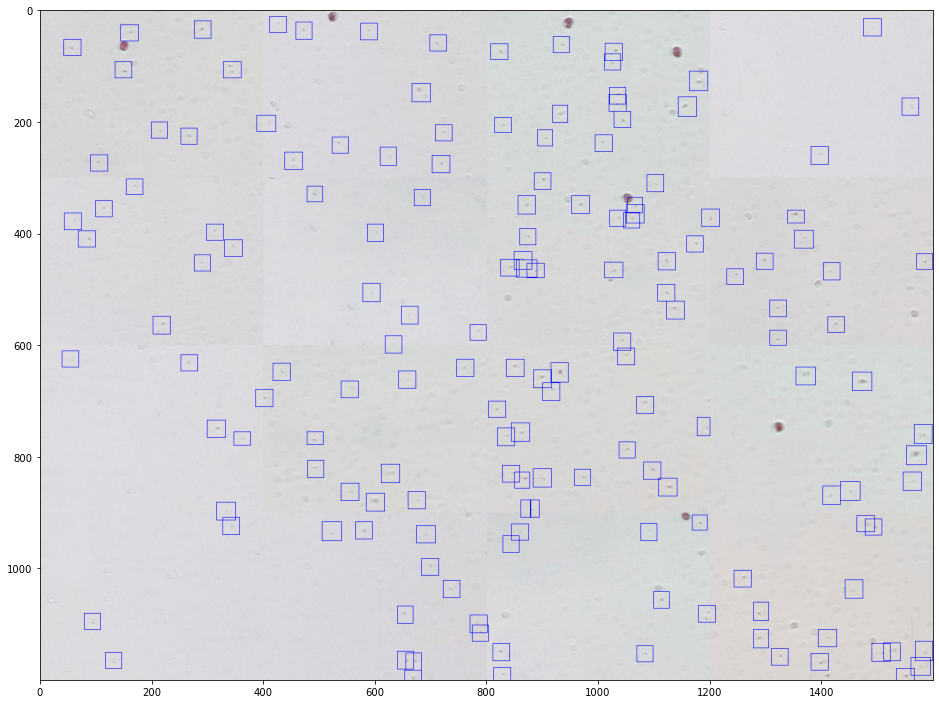

In [712]:
image_file = './single-training-data/200260_116_351_(0, 0).jpg'
json_file = './single-training-data/200260_116_351_(0, 0).json'

# orig = cv2.imread(image_file)
# plt.figure(figsize=(16,16))
# plt.imshow(orig)
pic, file = random_stitch(image_file, json_file, split=4)

pic = pic.astype(int)
# plt.figure(figsize=(16,16))
# plt.imshow(pic)

print(len(file['boundingBoxAnnotations']))
bound_box(file, pic)

#not transitioning to the right spot

prepre 0.8690625 0.8884375 0.15791666666666668 0.18541666666666667
pre 1390 1421 189 222
1390 1421 189 222
prepre 0.703125 0.721875 0.017083333333333332 0.04125
pre 1125 1155 20 49
1125 1155 20 49
prepre 0.8128124999999999 0.8309375 0.017916666666666668 0.042083333333333334
pre 1300 1329 21 50
1300 1329 21 50
prepre 0.7228125000000001 0.7421875 0.23125 0.2554166666666667
pre 1156 1187 277 306
1156 1187 277 306
prepre 0.7503124999999999 0.7684375 0.21916666666666668 0.2425
pre 1200 1229 263 291
1200 1229 263 291
prepre 0.634375 0.653125 0.25166666666666665 0.275
pre 1015 1045 302 330
1015 1045 302 330
prepre 0.669375 0.688125 0.28458333333333335 0.30875
pre 1071 1101 341 370
1071 1101 341 370
prepre 0.845 0.86375 0.23625 0.26208333333333333
pre 1352 1382 283 314
1352 1382 283 314
prepre 0.7034374999999999 0.7228125000000001 0.3025 0.3275
pre 1125 1156 363 393
1125 1156 363 393
prepre 0.93375 0.95125 0.0125 0.035833333333333335
pre 1494 1522 15 43
1494 1522 15 43
prepre 0.7921875 0.81281

(1200, 1600, 3)
prepre 0.1115625 0.1309375 0.8145833333333333 0.8420833333333333
pre 178 209 977 1010
178 209 977 1010
prepre 0.278125 0.296875 0.95875 0.9829166666666667
pre 445 475 1150 1179
445 475 1150 1179
prepre 0.1690625 0.1871875 0.9579166666666666 0.9820833333333333
pre 270 299 1149 1178
270 299 1149 1178
prepre 0.2578125 0.2771875 0.7445833333333334 0.76875
pre 412 443 893 922
412 443 893 922
prepre 0.2315625 0.2496875 0.7575000000000001 0.7808333333333333
pre 370 399 909 936
370 399 909 936
prepre 0.346875 0.365625 0.725 0.7483333333333333
pre 555 585 870 898
555 585 870 898
prepre 0.311875 0.330625 0.6912499999999999 0.7154166666666666
pre 499 529 829 858
499 529 829 858
prepre 0.13625 0.155 0.7379166666666667 0.76375
pre 218 248 885 916
218 248 885 916
prepre 0.2771875 0.2965625 0.6725 0.6975
pre 443 474 807 837
443 474 807 837
prepre 0.04875 0.06625 0.9641666666666666 0.9875
pre 78 106 1157 1185
78 106 1157 1185
prepre 0.1871875 0.2078125 0.6120833333333333 0.637916666666

158


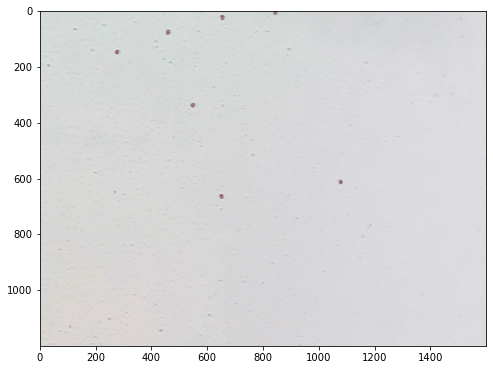

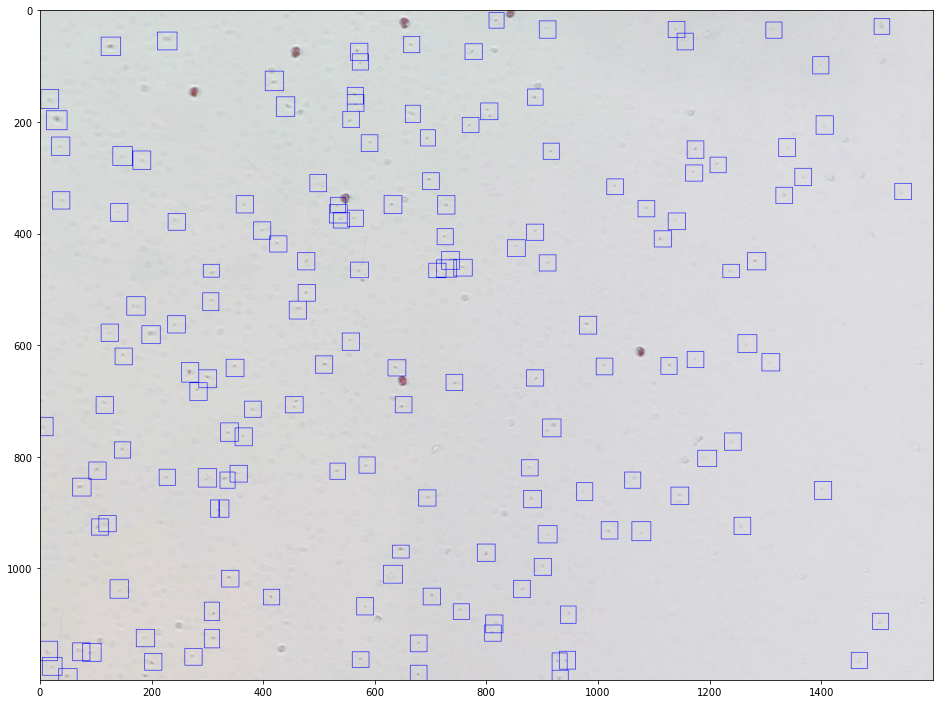

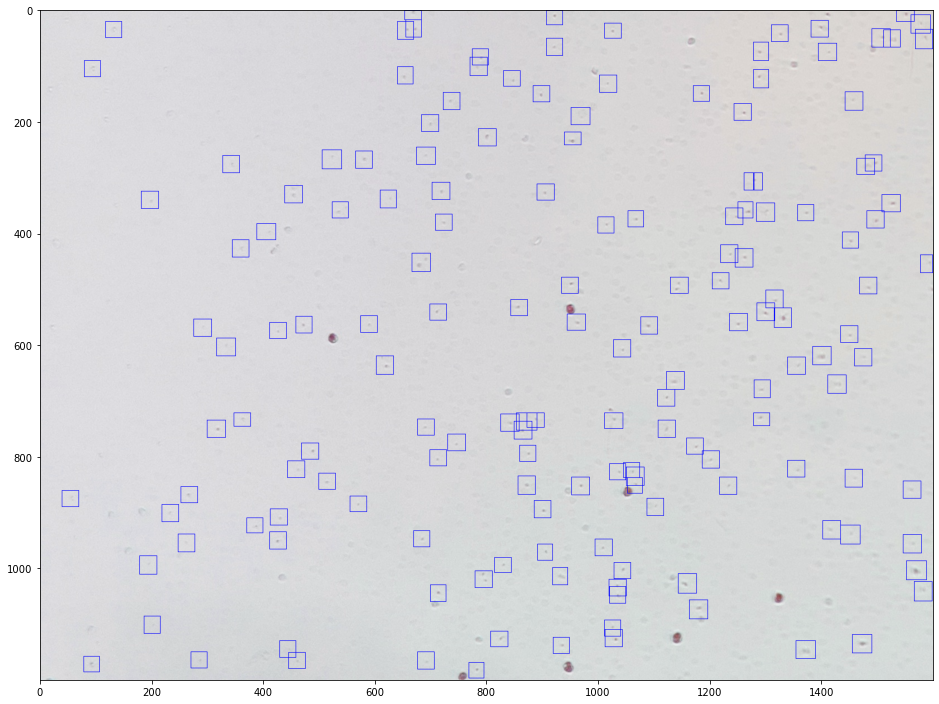

In [609]:
image_file = './single-training-data/200260_116_351_(0, 0).jpg'
json_file = './single-training-data/200260_116_351_(0, 0).json'

# draw_boxes.bound_box(json_file, image_file)

im = cv2.imread(image_file)
# plt.figure(figsize=(8,8))
# plt.imshow(im)

image, lr_file = lr_flip(image_file, json_file)


plt.figure(figsize=(8,8))
plt.imshow(image)

bound_box(lr_file, image)
ud_im, ud_file = ud_flip(image_file, json_file)

# plt.figure(figsize=(8,8))
# plt.imshow(up_down_im)
# print(ud_file)

print(ud_im.shape)
print(bound_box(ud_file, ud_im))

